# NE 205: Semiconductor Devices and IC Technology

## Homework 4

### Name : Gaurav Somani
### SR No. : 16082

In [2]:
import scipy as sp
from scipy import constants
import matplotlib.pyplot as plt
import matplotlib.text as mtext
import matplotlib.transforms as mtransforms
import math
from operator import sub

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
MU='\u03BC'    
approx= '\u2248'
exponent_2= '\u00b2'
epsilon_0 = 0.01*constants.epsilon_0 # multiply by 0.01 to covert to F/cm 
q=constants.e
k=constants.k
pi=constants.pi

T=300

Vth=k*T/q
a0=epsilon_0/q
a1=(2**(-1.5))
plt.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"] = (20,20)

### 1)

\begin{equation}
         C  = \frac{\epsilon_0 \epsilon_r A}{W} \\[10pt]
         \tau_{tr}^e = \frac {W} {v_{sat}^e}\\[10pt]  
         \tau_{tr}^h = \frac {W} {v_{sat}^h}\\[10pt]
\end{equation}

\begin{equation}
    \begin{aligned}
     \boxed {
     R = 20\ \Omega\\[10pt]
     (v_{sat})_e = 3\times 10^7 cm/s \\[10pt]
     (v_{sat})_h = 7\times 10^6 cm/s \\[10pt]
     \epsilon_r = 13
     } 
    \end{aligned}
    \label{pr1}
    \tag{1}
\end{equation}

\begin{equation}
      \implies 
      \boxed {
      \tau_{RC} = RC = \frac{\epsilon_0 \epsilon_r A R}{W} \\[20pt]
                \tau_{tr}  = \frac{1}{2} (\tau_{tr}^e + \tau_{tr}^h) = \frac{W}{2} (\frac{1}{v_{sat}^e} + \frac{1}{v_{sat}^h} )
                }
                \label{eq1.1}
    \tag{1.1}
\end{equation}

\begin{equation}
\implies 
\boxed
{
      f_{3dB} \approx \frac{1}{2\pi \sqrt{\tau_{RC}^2 + (0.36\ \tau_{tr})^2}} \approx \frac{1}{2\pi \sqrt{\frac{(\epsilon_0 \epsilon_r A R)^2}{W^2} + 0.032\ W^2 (\frac{1}{v_{sat}^e} + \frac{1}{v_{sat}^h} )^2}}
}
\label{eq1.2}
    \tag{1.2}
\end{equation}

$f_{3dB}$ is maximum when $0.36 \tau_{tr} \approx \tau_{RC}$

\begin{equation}
\implies 
\frac{\epsilon_0 \epsilon_r A R}{W} \approx 0.36\ \frac{W}{2} (\frac{1}{v_{sat}^e} + \frac{1}{v_{sat}^h} ) \\[20pt] 
\end{equation}

<center> for maximum $f_{3dB}$ <center>


$f_{3dB}$ is maximum when

\begin{equation}
\boxed {
W  \approx  2.36 \sqrt {\frac{\ \epsilon_0 \epsilon_r A R}{(\frac{1}{v_{sat}^e} + \frac{1}{v_{sat}^h} )}}  \\[20pt] 
}
\label{eq1.3}
    \tag{1.3}
\end{equation}

\begin{equation}
\implies 
\boxed {
 (f_{3dB})_{max} \approx  \frac{0.834}{\pi} \sqrt {\frac{1}{\epsilon_0 \epsilon_r A R (\frac{1}{v_{sat}^e} + \frac{1}{v_{sat}^h} )}}  \\[20pt] 
}
\label{eq1.4}
    \tag{1.4}
\end{equation}

In [3]:
epsilon_r=13
R=20
v_e=3e7
v_h=7e6
b=epsilon_0*epsilon_r*R
v_inv=(1/v_e)+(1/v_h)

def t_rc(A,W):
    return b*A/W

def t_tr(W):
    return 0.5*W*v_inv

def f3dB(A,W):
    return 1e-9/(2*pi*(t_rc(A,W)**2 + (0.36*t_tr(W))**2)**0.5) # multiply by 1e-9 to convert to GHz

a)


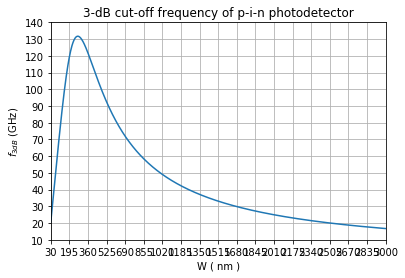

Optimum thickness of i-layer for maximum 3-dB cut-off frequency ≈ 0.27 μm = 270 nm
Maximum 3-dB cut-off frequency ≈ 132 GHz


In [4]:
W=sp.linspace(3e-2,3,1000) # W in microns
A=1e-6 # 100 square micrometer in sqaure centimeter
f = lambda W : f3dB(A,W*1e-4) # multiply by 1e-4 to convert W in microns to cm
f_3db = sp.vectorize(f)(W)
print("a)")
plt.grid(True, which="both")
plt.title('3-dB cut-off frequency of p-i-n photodetector')
plt.ylabel('$f_{3dB}$ (GHz)')
plt.xlabel('W ( nm )')
plt.xticks(sp.linspace(30, 3000, 19))
plt.yticks(sp.linspace(10, 140, 14))
plt.xlim([30,3000])
plt.ylim([10,140])
plt.plot(W*1e3,f_3db)
plt.show()
W_opt=2.36*(b*A/v_inv)**0.5 
f_max=f3dB(A,W_opt) 
print("Optimum thickness of i-layer for maximum 3-dB cut-off frequency "+approx+' '+str(round(W_opt*1e4,2))+' '+MU +'m' +" = "+str(round(W_opt*1e7))+" nm") # multiply by 1e7 to convert W in cm to nm
print("Maximum 3-dB cut-off frequency "+approx+' '+str(round(f_max))+" GHz")

In [5]:
A=1e-2 # 1 square millimeter in sqaure centimeter
W_opt=2.36*(b*A/v_inv)**0.5 
f_max=f3dB(A,W_opt) 
print("b)")
print("Optimum thickness of i-layer for maximum 3-dB cut-off frequency is proportional to square root of area and maximum 3-dB cut-off frequency is inversely proportional to square root of area.\n")
print("Area = 1 mm"+exponent_2)
print("Optimum thickness of i-layer for maximum 3-dB cut-off frequency "+approx+' '+str(round(W_opt*1e4))+' '+MU +'m') # multiply by 1e7 to convert W in cm to nm
print("Maximum 3-dB cut-off frequency "+approx+' '+str(round(f_max,1))+" GHz")

b)
Optimum thickness of i-layer for maximum 3-dB cut-off frequency is proportional to square root of area and maximum 3-dB cut-off frequency is inversely proportional to square root of area.

Area = 1 mm²
Optimum thickness of i-layer for maximum 3-dB cut-off frequency ≈ 27 μm
Maximum 3-dB cut-off frequency ≈ 1.3 GHz


### 2)

\begin{equation}
         V_{bi} = \phi_B+ \frac {k_B T}{q}(\hspace{4pt}ln\frac{N_D}{N_C} +  \frac{1}{\sqrt{8}} \frac{N_D}{N_C}) \\[10pt]
         W_{dep}  \approx \sqrt{\frac{2\epsilon_0 \epsilon_r (V_{bi} - \frac{k_B\ T}{q} )}{q N_D}} \\[10pt]
         F_{max} \approx \sqrt{\frac{2 q N_D (V_{bi} - \frac{k_B\ T}{q})}{\epsilon_0 \epsilon_r}}\\[10pt]
           \tau_{tr} = \frac {W_{dep}} {v_{sat}}\\[15pt]  
\end{equation}

\begin{equation}
        \begin{aligned}
        \boxed {
            N_C = 4 \times 10^{18} cm^{-3}  \\[10pt]
            \phi_B = 2\ V \\[10pt]
            \alpha = 2 \times 10^{5} cm^{-1}  \\[10pt]
            v_{sat} = 2\times 10^7 cm/s \\[10pt]
            \epsilon_r = 9 \\[10pt]
            F_{breakdown} = 5\ MV/cm \\[10pt]
            External\ Quantum\ Efficiency \ (EQE) \geq 0.6 \\[10pt]
            f_{3dB} \geq f_{min} = \ 10\ GHz \\[10pt]
            F_{max} \lt\ F_{breakdown}   
         }   
        \end{aligned}
        \label{pr2}
    \tag{2}
\end{equation}

\begin{equation}
\boxed
{
         W_{dep}  \approx \sqrt{\frac{2\epsilon_0 \epsilon_r (\phi_B+ \frac {k_B T}{q}(\hspace{4pt}ln\frac{N_D}{N_C} +  \frac{1}{\sqrt{8}} \frac{N_D}{N_C}) - \frac{k_B\ T}{q} )}{q N_D}} \\[10pt]
         F_{max} \approx \sqrt{\frac{2 q N_D (\phi_B+ \frac {k_B T}{q}(\hspace{4pt}ln\frac{N_D}{N_C} +  \frac{1}{\sqrt{8}} \frac{N_D}{N_C}) - \frac{k_B\ T}{q})}{\epsilon_0 \epsilon_r}}\\[10pt]
         f_{3dB} \approx \frac{1.39}{\pi \tau_{tr}} = \frac{1.39\ {v_{sat}}}{\pi W_{dep}} \\[15pt]
}
\label{eq2.1}
    \tag{2.1}
\end{equation}

\begin{equation}
\boxed {
External\ Quantum\ Efficiency \ (EQE)   = 1\ -\ e^{-\alpha\ W_{dep}} \\[10pt]
}         \label{eq2.2}
    \tag{2.2}
\end{equation}

\begin{equation}
\implies W_{dep}  = \frac{-\ ln(1-(EQE))}{\alpha} \\[10pt]
(EQE)_{min} = 0.6 \\[10pt]
\end{equation}

\begin{equation}
\implies
\boxed {
W_{dep}  \geq \frac{-\ ln(1-(EQE)_{min})}{\alpha} = \frac{-\ ln(0.4)}{\alpha} \\[10pt]
}         \label{eq2.3}
    \tag{2.3}
\end{equation}

From \eqref{pr2} and \eqref{eq2.1},
\begin{equation}
         f_{min} \leq f_{3dB} \approx  \frac{1.39\ {v_{sat}}}{\pi W_{dep}}
\end{equation}

\begin{equation}
  \implies \boxed {W_{dep} \leq \frac{1.39\ {v_{sat}}}{\pi f_{min} }}
     \label{eq2.4}
    \tag{2.4}
\end{equation}

From \eqref{pr2}, \eqref{eq2.1}, \eqref{eq2.3} and \eqref{eq2.4},

\begin{equation}
\implies
\boxed {
         \frac{-\ ln(0.4)}{\alpha} \leq \sqrt{\frac{2\epsilon_0 \epsilon_r (\phi_B+ \frac {k_B T}{q}(\hspace{4pt}ln\frac{N_D}{N_C} +  \frac{1}{\sqrt{8}} \frac{N_D}{N_C})- \frac{k_B\ T}{q} )}{q N_D}} \leq \frac{1.39\ {v_{sat}}}{\pi f_{min} } \\[10pt]
         F_{breakdown} \gt \sqrt{\frac{2 q N_D (\phi_B+ \frac {k_B T}{q}(\hspace{4pt}ln\frac{N_D}{N_C} +  \frac{1}{\sqrt{8}} \frac{N_D}{N_C}) - \frac{k_B\ T}{q})}{\epsilon_0 \epsilon_r}}\\[10pt]
}         
         \label{eq2.5}
    \tag{2.5}
\end{equation}

From \eqref{eq2.2},

\begin{equation}
\boxed {
(EQE)_{max}   = 1\ -\ e^{-\alpha\ (W_{dep})_{max}} \\[10pt]
}         \label{eq2.6}
    \tag{2.6}
\end{equation}


In [15]:
alpha=2e5
v_sat=2e7
f_min=1e10
phi_b=2
F_breakdown=5e6
Nc=4e18
epsilon_r=9
w_min_bound=-math.log(0.4)/alpha
w_max_bound=1.39*v_sat/(pi*f_min)
b0=a0*epsilon_r

def V_dep(Nd):
    r=Nd/Nc
    return phi_b+Vth*(math.log(r) + a1*r - 1)

def W_dep(Nd):
    return (2*b0*V_dep(Nd)/Nd)**0.5

def F_max(Nd):
    return (2*V_dep(Nd)*Nd/b0)**0.5

N_min=1e13
N_max=1e18

while(N_max/N_min - 1> 1e-6):
        N = 0.5*(N_min + N_max)      
        if(W_dep(N)>w_min_bound):
            N_min=N
        else:
            N_max=N

Nd_max=N            

N_min=1e13
N_max=1e18
    
while(N_max/N_min - 1> 1e-6):
        N = 0.5*(N_min + N_max)      
        if(W_dep(N)>w_max_bound):
            N_min=N
        else:
            N_max=N
            
Nd_min=N

N_min=1e13
N_max=1e18

min_N = round(Nd_min/N_min,2)
max_N = round(Nd_max/N_max,2)

EQE_max=1-math.exp(-alpha*w_max_bound)
eqe_percent=round(EQE_max*100,2)

Solving the above inequalities, 

{{min_N}}  $ \times\ 10^{13} cm^{-3} \leq N_D \leq $ {{max_N}}  $\times\ 10^{18} cm^{-3}$

Maximum External Quantum Efficiency  $\approx$ {{eqe_percent}} %

### 3)

\begin{equation}
\begin{aligned}
        \boxed {
            N_{D,collector} = 10^{16}\ cm^{-3} \\[10pt]
            N_{A,base} = 2 \times 10^{17}\ cm^{-3} \\[10pt]
            n_i = 1.5 \times 10^{10}\ cm^{-3} \\[10pt]
            D_b =  30\hspace{2pt}cm^2 / s \\[10pt]
            D_e =  10\hspace{2pt}cm^2 / s \\[10pt]
            L_b =  15\hspace{2pt}\mu m\\[10pt]
            L_e =  5\hspace{2pt}\mu m\\[10pt]
            V_{CB} = 5\ V \\[10pt]
            T = 300 K \\[10pt]
            \epsilon_r = 11.9 \\[10pt]
            \Delta E_G = - 22.5\ \sqrt {\frac{N_D}{10^{18} } }\ meV\ at\ T\ =\ 300\ K
         }   
        \end{aligned}
        \label{pr3}
    \tag{3}
\end{equation}

In [7]:
epsilon_r=11.9
Db=30
De=10
Lb=15
Le=5
Na=2e17
Nd_c=1e16
ni=1.5e10
Vcb=5
c=(Db/De)*(Le/Lb)/Na
d=2*a0*epsilon_r*(Nd_c/Na)/(Na+Nd_c)
Vbi=Vth*math.log(Na*Nd_c/(ni*ni))
W_dep = ((d*(Vcb+Vbi-Vth))**0.5)*1e4 # W_dep in microns

Wd=round(W_dep,3)
Vb=round(Vbi,3)

### $(V_{bi})_{CB} \approx \frac {k_B T}{q}\hspace{4pt}ln\frac{N_{D,collector}\  N_{A,base}}{n_i^2} \approx $ {{Vb}} V

###  $\implies 
(W_{dep})_{base}  \approx \sqrt{\frac{2\epsilon_0 \epsilon_r (V_{CB} + (V_{bi})_{CB} - \frac{k_B\ T}{q} )}{q} \frac{N_{D,collector}}{N_{A,base}} \frac{1}{N_{A,base}+N_{D,collector}}} \approx$  {{Wd}} $\mu m$

\begin{equation}
W_{bn} = W_{base} - (W_{dep})_{base}\\[10pt]
\end{equation}

\begin{equation}
\implies
\boxed 
{ \beta = \frac  {N_{D,emitter} D_b L_e} {N_{A,base} D_e L_b} e^{\frac{\Delta E_G}{k_B T}} coth(\frac{W_{bn}}{L_b}) = \frac  {N_{D,emitter} D_b L_e} {N_{A,base} D_e L_b} e^{\frac{\Delta E_G}{k_B T}} coth(\frac{W_{base} - (W_{dep})_{base}}{L_b})
}
       \label{eq3.1}
    \tag{3.1}
\end{equation}

TypeError: unsupported operand type(s) for -: 'int' and 'function'

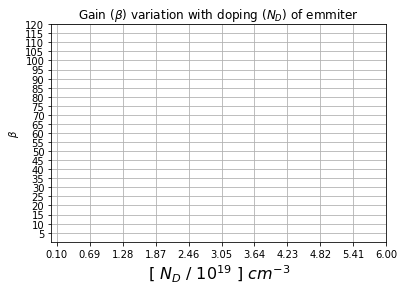

In [14]:
def bet(Nd,Wb):
    delta_Eg=-0.0225*(Nd/1e18)**0.5
    return Nd*c*math.exp(delta_Eg/Vth)/math.tanh((Wb-W_dep)/Lb)

gain = lambda Nd,Wb : bet(Nd,Wb) 
Nd = sp.linspace(1e18,6e19,6000)
plt.grid(True, which="both")
plt.title(r'$\beta$')
plt.title('Gain '+ r'($\beta$)'+' variation with doping ($N_D$) of emmiter')
plt.ylabel(r'$\beta$')
plt.xlabel('[ $N_D$ / $10^{19}$ ] $cm^{-3}$',fontsize=16)
plt.xticks(sp.linspace(0.1, 6, 11))
plt.yticks(sp.linspace(5, 120, 24))
plt.text(1,sp.vectorize(bet)(1e19,1), 'W = 1 $\mu$m',fontsize=16)
plt.text(1,sp.vectorize(bet)(1e19,0.5), 'W = 0.5 $\mu$m',fontsize=16)
plt.plot(Nd*1e-19,sp.vectorize(bet)(Nd,1),Nd*1e-19,sp.vectorize(bet)(Nd,0.5))
plt.show()